In [1]:
import nltk
import string 
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

In [2]:
# nltk.download_shell()

In [3]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])
messages.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
#creating new column with length
messages['length'] = messages['message'].apply(len)

## visualising data

In [7]:
messages.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

<AxesSubplot:ylabel='Frequency'>

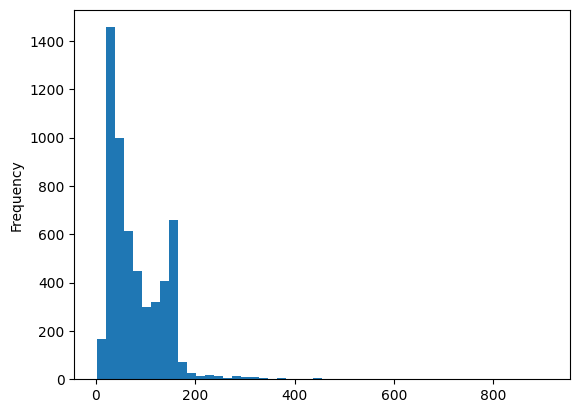

In [9]:
messages['length'].plot.hist(bins=50)

In [10]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

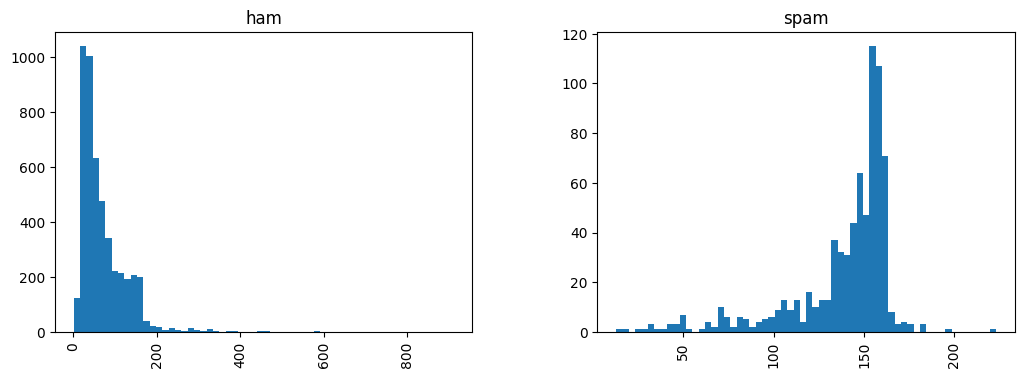

In [11]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [12]:
#create a function to process data
def text_process(mess):
  """
    1. remove puntuation
    2.remove stop words
    3.return list of clean data
  """
  no_punct = ''.join([words for words in mess if words not in string.punctuation])
  no_punct = no_punct.split()
  preprocessed_text = [word for word in no_punct if word.lower() not in stopwords.words('english')]
  return preprocessed_text

In [13]:
#split the data 
X = messages['message']
y = messages['label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
#create a pipleline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
import pickle

pipeline = Pipeline(
    [
        ('vectorize',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier_model',MultinomialNB())
    ]
)

pipeline.fit(X_train,y_train)

pickle.dump(pipeline,open('spammodel.pkl','wb'))


In [15]:
predictions = pipeline.predict(X_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
print("Accurency score is: {:.2f} ".format(accuracy_score(y_test,predictions)))

Accurency score is: 0.96 


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.72      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
np.set_printoptions(2)
print(confusion_matrix(y_test,predictions))

[[1448    0]
 [  62  162]]


In [ ]:
pipeline.classes_

array(['ham', 'spam'], dtype='<U4')

In [ ]:
model = pickle.load(open('spammodel.pkl','rb'))


In [ ]:
model.predict(['Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 '])

array(['spam'], dtype='<U4')

<AxesSubplot:>

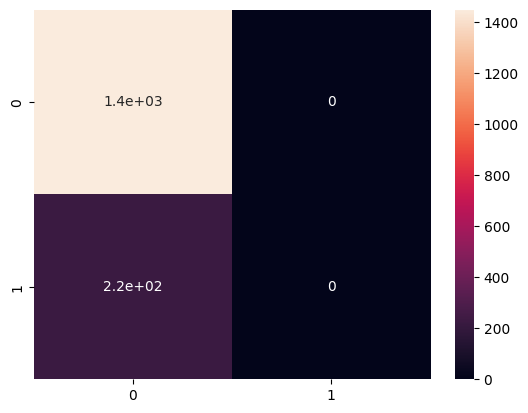

In [ ]:
import seaborn as sns 
import numpy as np 
labels = ['True Pos','False Pos','False Neg','True Neg']
labels = np.asarray(labels).reshape(2,2)
np.set_printoptions(2)
sns.heatmap(
    data = confusion_matrix(y_test,model.predict(y_test)),
    annot=True
    
)